# 📊 Descripción de Variables del Dataset

## 🔹 1. Información de la URL
| Variable              | Descripción                                                        |
|-----------------------|--------------------------------------------------------------------|
| `FILENAME`            | Nombre del archivo fuente (no usada para entrenamiento)            |
| `URL`                 | Dirección web completa                                             |
| `URLLength`           | Longitud total del URL                                             |
| `Domain`              | Dominio principal del sitio                                        |
| `DomainLength`        | Longitud del dominio                                               |
| `IsDomainIP`          | 1 si el dominio es una IP, 0 si es nombre de dominio               |
| `TLD`                 | Dominio de nivel superior (ej. `.com`, `.org`)                     |
| `TLDLength`           | Longitud del TLD                                                   |
| `TLDLegitimateProb`   | Probabilidad de legitimidad basada en el TLD                      |

## 🔹 2. Características del texto de la URL
| Variable              | Descripción                                                        |
|-----------------------|--------------------------------------------------------------------|
| `URLSimilarityIndex`  | Similitud con URLs legítimas conocidas                             |
| `CharContinuationRate`| Continuidad de caracteres (indicador de patrones sospechosos)      |
| `URLCharProb`         | Probabilidad de legitimidad basada en los caracteres usados        |
| `NoOfLettersInURL`    | Número de letras en la URL                                         |
| `LetterRatioInURL`    | Proporción de letras respecto al total                             |
| `NoOfDegitsInURL`     | Número de dígitos en la URL                                        |
| `DegitRatioInURL`     | Proporción de dígitos en la URL                                    |

## 🔹 3. Caracteres especiales
| Variable                    | Descripción                                                  |
|-----------------------------|--------------------------------------------------------------|
| `NoOfEqualsInURL`           | Número de signos igual `=`                                   |
| `NoOfQMarkInURL`            | Número de signos de interrogación `?`                        |
| `NoOfAmpersandInURL`        | Número de signos `&`                                         |
| `NoOfOtherSpecialCharsInURL`| Otros caracteres especiales diferentes a los anteriores      |
| `SpacialCharRatioInURL`     | Proporción total de caracteres especiales en la URL          |

## 🔹 4. Obfuscación
| Variable              | Descripción                                                        |
|-----------------------|--------------------------------------------------------------------|
| `HasObfuscation`      | 1 si contiene ofuscación, 0 en caso contrario                      |
| `NoOfObfuscatedChar`  | Número total de caracteres ofuscados                               |
| `ObfuscationRatio`    | Proporción de caracteres ofuscados en la URL                       |

## 🔹 5. HTML y estructura del sitio
| Variable              | Descripción                                                        |
|-----------------------|--------------------------------------------------------------------|
| `IsHTTPS`             | 1 si utiliza HTTPS, 0 si no                                        |
| `LineOfCode`          | Número de líneas del código HTML                                   |
| `LargestLineLength`   | Longitud de la línea más larga del HTML                            |
| `HasTitle`            | 1 si el sitio tiene `<title>`, 0 si no                             |
| `HasFavicon`          | 1 si contiene un favicon                                           |
| `IsResponsive`        | 1 si es un sitio web responsive                                    |
| `HasDescription`      | 1 si contiene meta descripción                                     |
| `NoOfPopup`           | Número de pop-ups detectados                                       |
| `NoOfiFrame`          | Número de etiquetas `<iframe>`                                     |
| `HasExternalFormSubmit`| 1 si los formularios se envían fuera del dominio                  |
| `HasSocialNet`        | 1 si tiene enlaces a redes sociales                                |
| `HasSubmitButton`     | 1 si existe botón de envío                                         |
| `HasHiddenFields`     | 1 si hay campos ocultos                                            |
| `HasPasswordField`    | 1 si contiene campo de contraseña                                  |

## 🔹 6. Indicadores temáticos del sitio
| Variable              | Descripción                                                        |
|-----------------------|--------------------------------------------------------------------|
| `Bank`                | 1 si el sitio parece relacionado con banca                         |
| `Pay`                 | 1 si el sitio está relacionado con pagos                           |
| `Crypto`              | 1 si el sitio tiene contenido sobre criptomonedas                  |
| `HasCopyrightInfo`    | 1 si se detecta información de derechos de autor                   |

## 🔹 7. Recursos HTML referenciados
| Variable              | Descripción                                                        |
|-----------------------|--------------------------------------------------------------------|
| `NoOfImage`           | Número de imágenes `<img>` en el sitio                             |
| `NoOfCSS`             | Número de hojas de estilo CSS                                      |
| `NoOfJS`              | Número de scripts JavaScript                                       |
| `NoOfSelfRef`         | Número de recursos que apuntan al mismo dominio                    |
| `NoOfEmptyRef`        | Número de referencias vacías                                       |
| `NoOfExternalRef`     | Número de referencias externas                                     |

## 🎯 8. Variable objetivo
| Variable              | Descripción                                                        |
|-----------------------|--------------------------------------------------------------------|
| `label`               | 1 si es un sitio malicioso, 0 si es legítimo   



https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score



In [9]:
%%capture
!pip install ydata-profiling
from ydata_profiling import ProfileReport
!pip install xgboost
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'ydata_profiling'

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/juancmacias/datas/main/DataSet/PhiUSIIL_Phishing_URL_Dataset.csv")


print("Shape:", df.shape)
df.head(100)

Shape: (235795, 56)


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,172246.txt,https://www.nutritioncare.org,28,www.nutritioncare.org,21,0,org,100.0,1.000000,0.079963,...,0,0,1,16,3,25,101,1,68,1
96,890792.txt,https://www.tileandstonejournal.com,34,www.tileandstonejournal.com,27,0,com,100.0,1.000000,0.522907,...,0,0,1,48,9,14,208,18,212,1
97,480933.txt,https://www.c.line-design.fr,27,www.c.line-design.fr,20,0,fr,100.0,0.538462,0.014148,...,0,0,1,63,3,17,5,2,32,1
98,507550.txt,https://www.capeblancoheritagesociety.com,40,www.capeblancoheritagesociety.com,33,0,com,100.0,1.000000,0.522907,...,0,0,1,15,2,10,0,2,9,1


In [11]:
print(df[df["label"] == 0])

            FILENAME                                                URL  \
11       mw42508.txt                            http://www.teramill.com   
20       mw16985.txt                        http://www.f0519141.xsph.ru   
21      mw131249.txt                           http://www.shprakserf.gq   
27       7972389.txt             https://service-mitld.firebaseapp.com/   
28       mw34096.txt                  http://www.kuradox92.lima-city.de   
...              ...                                                ...   
235780   8020762.txt      https://ww.prestamo.enlinea.pe.vpphoangha.vn/   
235782   8091639.txt  http://goldenrod-motley-texture.glitch.me/hvwa...   
235783   8095159.txt        https://bancolombia.com1home0892.repl.co/?2   
235784   8060468.txt                 https://aol-108318.weeblysite.com/   
235793   7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   

        URLLength                                           Domain  \
11             22            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

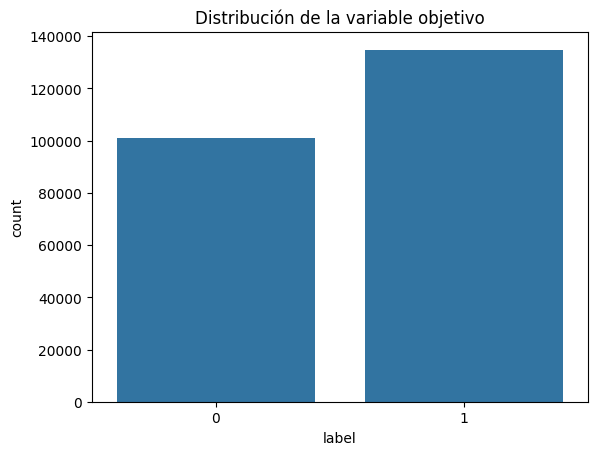

In [12]:

# Info general
df.info()
df.describe()

# Distribución de variables
sns.countplot(x='label', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

In [13]:
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



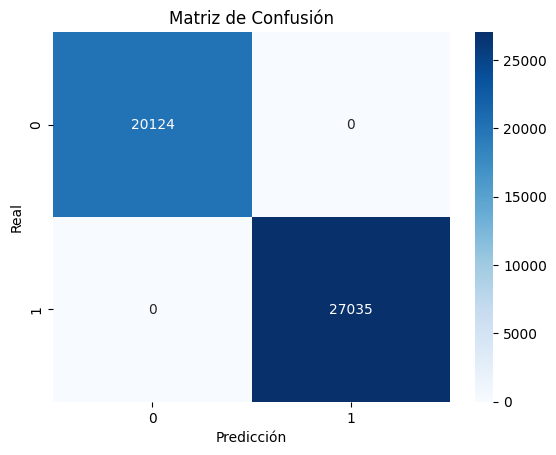

In [19]:
# Limpiar columnas
columnas_a_eliminar = ['FILENAME', 'URL', 'Domain', 'Title']

df.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')
# guardar mapeo
tld_mapping = dict(enumerate(df['TLD'].astype('category').cat.categories))
reverse_tld_mapping = {v: k for k, v in tld_mapping.items()}
joblib.dump(reverse_tld_mapping, "tld_mapping.pkl")

# Codificar TLD como entero
df['TLD'] = df['TLD'].astype('category').cat.codes

# Asegurar booleanos como enteros
boolean_cols = [
    'IsDomainIP','HasObfuscation','IsHTTPS','HasTitle','HasFavicon',
    'IsResponsive','HasDescription','HasExternalFormSubmit','HasSocialNet',
    'HasSubmitButton','HasHiddenFields','HasPasswordField',
    'Bank','Pay','Crypto','HasCopyrightInfo'
]

for col in boolean_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

# Separar features y label
X = df.drop('label', axis=1)
y = df['label']

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo RandomforestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [20]:
# Validación de Overfitting
y_train_pred = clf.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_pred)
diff = abs(acc_train - acc_test)

print(f"\nAccuracy en entrenamiento: {acc_train:.4f}")
print(f"Accuracy en test:          {acc_test:.4f}")
print(f"Diferencia absoluta:       {diff:.4f}")

if diff > 0.05:
    print(f"⚠️  El modelo presenta sobreajuste > 5%", diff)
else:
    print(f"✅  No hay sobreajuste significativo (≤ 5%)", diff)


Accuracy en entrenamiento: 1.0000
Accuracy en test:          1.0000
Diferencia absoluta:       0.0000
✅  No hay sobreajuste significativo (≤ 5%) 0.0


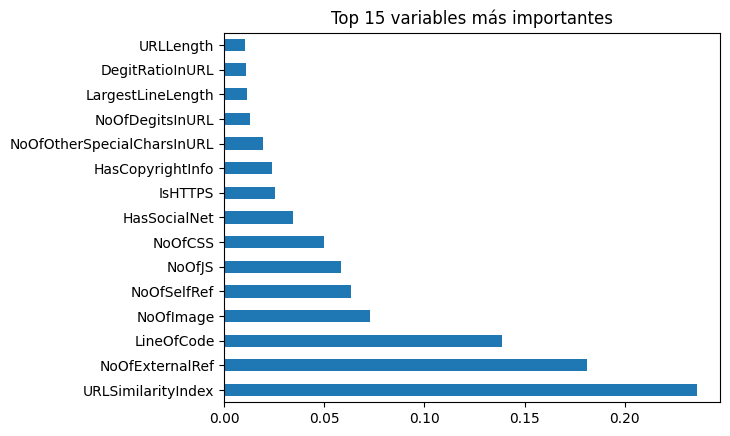

In [21]:
# Importancia de características
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 variables más importantes")
plt.show()

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



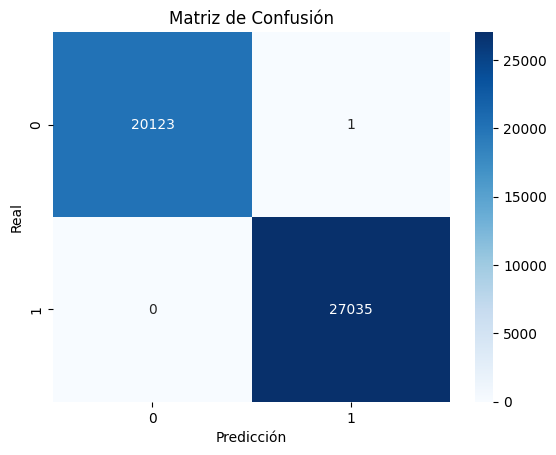

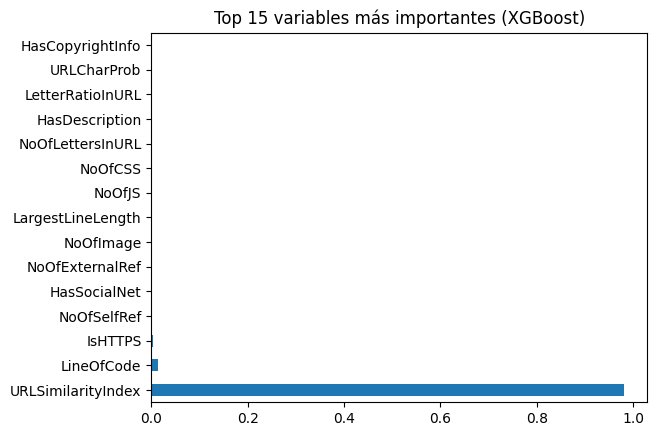

In [24]:
from xgboost import XGBClassifier
# Modelo XGBoost
xgb = XGBClassifier( eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predicción y evaluación
y_pred = xgb.predict(X_test)

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Importancia de características
importances = pd.Series(xgb.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 variables más importantes (XGBoost)")
plt.show()

In [25]:

# Predicciones
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
diff = abs(acc_train - acc_test)

print(f"Accuracy en entrenamiento: {acc_train:.4f}")
print(f"Accuracy en test:         {acc_test:.4f}")
print(f"Diferencia absoluta:      {diff:.4f}")

# Verificar sobreajuste
if diff > 0.05:
    print(f"\n⚠️ El modelo presenta sobreajuste > 5%", diff)
else:
    print(f"\n✅ No hay sobreajuste significativo (≤ 5%)", diff)


Accuracy en entrenamiento: 1.0000
Accuracy en test:         1.0000
Diferencia absoluta:      0.0000

✅ No hay sobreajuste significativo (≤ 5%) 2.120486015400047e-05


In [26]:
import joblib

# Guardando los modelos entrenados
joblib.dump(xgb, "model_xgb.pkl")
print("Modelo guardado como 'model_xgb.pkl'")

joblib.dump(clf, "model_clf.pkl")
print("Modelo guardado como 'model_clf.pkl'")

Modelo guardado como 'model_xgb.pkl'
Modelo guardado como 'model_clf.pkl'


In [27]:
from IPython.display import HTML
profile_change = ProfileReport(df,title="URL Phisihing Profiling Report", explorative=True,)
profile_change.to_file("output_change.html")
HTML(filename='output_change.html')

NameError: name 'ProfileReport' is not defined